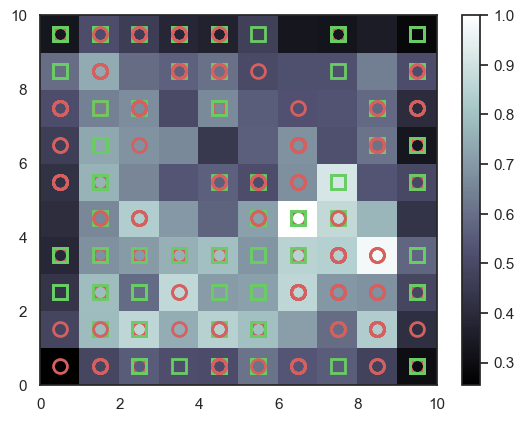

In [119]:
!pip install MiniSom

"""### Importing the libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""## Importing the dataset"""

dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

"""## Feature Scaling"""

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

"""##Training the SOM"""

from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

"""##Visualizing the results"""

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()



In [129]:
"""## Finding the frauds"""

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,3)], mappings[(6,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)

"""##Printing the Fraunch Clients"""

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15793825
15696361
15750104
15668679
15773421
15682686
15707602
15598614
15611189
15712483
15572361


In [145]:
#supervised learning#

customers = dataset.iloc[:, 1:].values 
is_fraud=np.zeros(len(dataset))
print(customers)


[[1.000e+00 2.208e+01 1.146e+01 ... 1.000e+02 1.213e+03 0.000e+00]
 [0.000e+00 2.267e+01 7.000e+00 ... 1.600e+02 1.000e+00 0.000e+00]
 [0.000e+00 2.958e+01 1.750e+00 ... 2.800e+02 1.000e+00 0.000e+00]
 ...
 [0.000e+00 1.883e+01 9.540e+00 ... 1.000e+02 1.000e+00 1.000e+00]
 [0.000e+00 2.742e+01 1.450e+01 ... 1.200e+02 1.200e+01 1.000e+00]
 [1.000e+00 4.100e+01 4.000e-02 ... 5.600e+02 1.000e+00 1.000e+00]]


In [147]:
for i in range (len(dataset)):
   if dataset.iloc[i,0] in frauds :
     is_fraud[i] =1

In [155]:
#ANN#

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2,kernel_initializer='uniform', activation='relu',input_dim=15))

ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform', activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(customers,is_fraud, batch_size = 1, epochs = 2)
y_pred = ann.predict(customers)

Epoch 1/2


C:\Users\Prath\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9696 - loss: 0.5904
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9828 - loss: 0.1640
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [157]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [159]:
print(y_pred)

[[1.57901130e+07 7.89096113e-03]
 [1.56993400e+07 1.22098858e-02]
 [1.55714150e+07 1.30429296e-02]
 ...
 [1.55723610e+07 1.14407137e-01]
 [1.57067620e+07 1.16473943e-01]
 [1.56058720e+07 1.28350943e-01]]
